## ML Assignment 1

Claire Wang

## 1. From the L2-regularized cross-entropy loss function given below, derive the formula for a single gradient descent update for $w_k \in w$. Why would $L1$ be more difficult than calculating the formula for an $L2$ regularized model?


Here the L2-regularized Cross Entropy is defined as:
$$L=-\sum y_i ln(p(x_i)) + (1-y_i)ln(1-p(x_i)) + \lambda ||\omega||^2$$
where $p(x_i)=\frac{1}{1+e^{-\omega ' x}}$.

Gradient Descent is to minimize the loss function by using its derivative.

Derive L2 for a single gradient descent for $w_k \in w$:

$\frac{\partial L(W)}{\partial \omega_k}= \frac{\partial}{\partial \omega_k} [-\sum (y_i ln(\frac{1}{1+e^{-\omega x_i}}) + (1-y_i)ln(1-\frac{1}{1+e^{-\omega x_i}})) + \lambda ||\omega||^2)]$.

First derive this part:

$-\frac{\partial}{\partial \omega_k}\sum (y_i ln(\frac{1}{1+e^{-\omega x_i}}) + (1-y_i)ln(1-\frac{1}{1+e^{-\omega x_i}}))$

$=-\sum y_i(1+e^{-\omega x_i}) (-1)(\frac{1}{1+e^{-\omega x_i}})^2 e^{-\omega x_i}(-x_i) + (1-y_i) \frac{1+e^{-\omega x_i}}{e^{-\omega x_i}} (\frac{1}{1+e^{-\omega x_i}})^2 e^{-\omega x_i}(-x_i)$

$=-\sum y_i x_i \frac{e^{-\omega x_i}}{1+e^{-\omega x_i}} - (1-y_i)x_i \frac{1}{1+e^{-\omega x_i}}$

$=-\sum y_i x_i (\frac{e^{-\omega x_i}}{1+e^{-\omega x_i}} + \frac{1}{1+e^{-\omega x_i}}) - x_i \frac{1}{1+e^{-\omega x_i}}$

$=\sum -y_i x_i + x_i p(x_i) = \sum -(y_i-p(x_i))x_i$


then derive the left part:

$-\frac{\partial}{\partial \omega_k} \lambda ||\omega||^2 = = -\frac{\partial}{\partial \omega_k} (\omega_1^2 + \omega_2^2 +...+\omega_k^2 + ...) = -2 \lambda \omega_k$

therefore:

$$\frac{\partial L(W)}{\partial \omega_k} = \sum -(y_i-p(x_i))x_i - 2 \lambda \omega_k$$





L1 is more difficult than calculating the formula for an L2 regularized model because $\frac{\partial}{\partial \omega_k} \lambda \sum |\omega_i|$ is more difficult to solve than $\frac{\partial}{\partial \omega_k} \lambda\sum \omega_i^2$, which leads to sparce solutions.

## 2.  Which logistic regression model (unregularized, L2, or L1) and parameters ($\lambda$ high or low) may be more useful for determining a small set of parameters that are most important for classification? Why?

Lasso tends to do well if there are a small number of significant parameters and the others are close to zero (ergo: when only a few predictors actually influence the response).

(Ridge works well if there are many large parameters of about the same value (ergo: when most predictors impact the response).)

However, in practice, we don't know the true parameter values, so the previous two points are somewhat theoretical. Just run cross-validation to select the more suited model for a specific case.

Also, a low lambda would be better for a small set of parameters that are most important for classification, because we want the coefficients to be larger to be more visible compared to the rest of the parameters.

## 3. miRNA serum


1)  Create a L2-regularized logistic regression model to train stochastic gradient descent on the dataset
 
2) Return the cross-entropy loss from at least 40 epochs.  (at least 40 iterations)

3) Plot the training and validation loss curves. 

4) Indicate which iteration gives the best model, and explain your decision. 

5) Also list and explain your hyperparameter choices (learning rate, regularization parameter)
 
 
(First try implementing without regularization, then add the regularization terms; also, try different initializations)

In [35]:
import pandas as pd
import numpy as np
X_test = pd.read_csv('X_test.csv',index_col=0)
Y_test = pd.read_csv('Y_test.csv',index_col=0, header=None)

X_train = pd.read_csv('X_train.csv',index_col=0)
Y_train = pd.read_csv('Y_train.csv',index_col=0,header=None)

X_val = pd.read_csv('X_val.csv',index_col=0)
Y_val = pd.read_csv('Y_val.csv',index_col=0, header=None)

In [36]:
X_val

,1,2,3,4,5,6,7,8,9,10,...,238,239,240,241,242,243,244,245,246,247
3354,1.668847,2.815793,4.406506,1.668847,1.668847,1.668847,1.789895,1.668847,1.668847,3.609130,...,1.668847,3.738934,3.323958,7.317184,1.668847,1.668847,1.668847,12.790970,2.124105,1.668847
843,6.339653,5.224627,5.517739,4.438802,5.280231,4.438802,4.438802,6.089165,4.748844,4.895887,...,4.438802,4.438802,4.438802,6.484823,4.438802,4.438802,4.438802,13.602147,4.438802,4.438802
1536,0.106321,0.106321,4.626492,0.106321,0.106321,0.106321,0.106321,1.297035,0.247058,3.822947,...,0.106321,4.010063,0.106321,7.124066,0.106321,1.138072,0.106321,12.638651,2.678498,0.106321
2986,2.783061,1.757631,4.533316,1.584014,1.584014,2.345445,1.584014,2.141590,1.584014,3.933394,...,2.190110,4.618159,1.584014,7.194896,2.348820,1.584014,3.892735,12.786052,3.761113,3.895201
3609,2.172798,2.172798,4.608753,2.918387,3.245393,2.172798,3.369072,2.172798,2.172798,3.425787,...,2.172798,4.465491,2.172798,7.018009,3.810020,2.172798,2.710400,12.975085,2.841749,2.294369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,6.372373,6.372373,6.372373,6.372373,6.372373,6.372373,6.372373,6.372373,6.372373,6.372373,...,6.372373,6.372373,6.372373,6.620049,6.372373,6.372373,6.372373,13.200571,6.372373,6.372373
720,6.051375,3.801965,5.054876,2.539181,3.857434,2.539181,2.733472,4.661771,2.539181,4.275232,...,2.539181,2.539181,2.539181,6.062675,2.539181,2.539181,2.539181,12.368748,3.007394,3.358611
3646,3.475436,3.022719,4.471867,3.022719,3.022719,3.022719,3.022719,3.022719,3.022719,3.696326,...,3.022719,4.063070,3.022719,6.852801,3.235907,3.022719,3.022719,12.578440,3.374728,3.022719
3290,1.798023,1.798023,4.263286,1.798023,1.798023,1.798023,1.798023,1.798023,1.798023,2.233266,...,1.798023,3.922277,1.798023,6.534373,2.061887,1.798023,1.798023,12.577388,1.798023,1.798023


In [37]:
Y_val

,1
0,
3354,0
843,1
1536,0
2986,0
3609,0
...,...
572,1
720,1
3646,0


In [38]:
# to get weights (coefficients) of the data:
#Y_train = Y_train.value.ravel()
#Y_val = Y_val.value.ravel()
#Y_test = Y_test.value.ravel()

from sklearn.linear_model import LogisticRegression
clf_train = LogisticRegression()
clf_train.fit(X_train,Y_train)

coef_train= clf_train.coef_
coef_train= coef_train.reshape(247,1)

clf_val = LogisticRegression()
clf_val.fit(X_val,Y_val)
coef_val = clf_val.coef_

coef_val = coef_val.reshape(247,1)
coef_val

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 3.88138364e-01],
       [ 9.93601562e-03],
       [ 6.03898684e-02],
       [-3.23842781e-01],
       [ 1.12741639e-01],
       [-1.68655085e-01],
       [ 7.84803594e-02],
       [-2.42603166e-02],
       [ 7.84699499e-02],
       [ 5.27818578e-01],
       [-4.09657351e-01],
       [ 3.48702288e-01],
       [ 2.86988961e-01],
       [ 2.89848723e-01],
       [-1.14526372e+00],
       [-2.33625423e-01],
       [ 6.51030391e-01],
       [ 6.67092240e-01],
       [-3.59465776e-01],
       [-1.83338508e-01],
       [-6.06156652e-03],
       [-3.24090324e-01],
       [-5.69021240e-01],
       [-1.76546557e-01],
       [-5.24257464e-01],
       [-2.60065789e-01],
       [-2.45493565e-02],
       [-2.22508026e-01],
       [ 3.06120344e-01],
       [-4.15210789e-01],
       [ 1.43653296e-01],
       [-1.77045895e-01],
       [ 1.79623598e-01],
       [ 2.02098910e-01],
       [ 4.44778831e-01],
       [ 1.41927602e-01],
       [-3.73813919e-01],
       [ 6.92751141e-01],
       [ 1.6

In [39]:
X_train.shape

(1325, 247)

In [40]:
Y_train.shape

(1325, 1)

In [41]:
coef_val.shape

(247, 1)

In [42]:
def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

For logistic regression, use the cost function as the error function:

In [43]:
def predict(features, weights): 
  '''
  Returns 1D array of probabilities
  that the class label == 1
  '''
  z = np.dot(features, weights)
  return sigmoid(z)


In [44]:
np.dot(X_train, coef_train)

array([[11.399498  ],
       [-6.18028163],
       [ 4.53326649],
       ...,
       [ 6.98245595],
       [-6.84736853],
       [-4.07950437]])

In [45]:
predict(X_train, coef_train)

array([[0.9999888 ],
       [0.00206557],
       [0.98936872],
       ...,
       [0.99907284],
       [0.00106112],
       [0.01663446]])

In [46]:
def cost_function(features, labels, weights):
    '''
    Using Mean Absolute Error

    Features:(1325,247)
    Labels: (1325,1)
    Weights:(247,1)
    Returns 1D matrix of predictions
    Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions) # to kill RuntimeWarning: divide by zero encountered in log

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

    Define a function to calculate the stochastic gradient update:
$$\omega_k'=\omega_k + \alpha [\sum_i^N(y_i-p(x_i))x_i+2\lambda \omega_k]$$

In [47]:
def update_weights(features, labels, weights, lr, rp): # lr= learning rate, rp = regularization parameter
    '''
    Vectorized Gradient Descent

    Features:(1325,247)
    Labels: (1325,1)
    Weights:(247,1)
    '''
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N
    
    # Regularized cost function = cost function + P
    gradient += 2 * rp * weights

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights += gradient

    return weights

In [48]:
def train(features, labels, weights, lr, rp, iters): 
    ite=[]
    cost_history= []
    for i in range(iters):
        weights = update_weights(features, labels, weights, lr, rp)
        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)
        ite.append(i)

    return ite, cost_history

Before we feed in the data, learning rate and regularization parameters. We first determine which regularization parameter to use by comparing the accuracy score:

In [49]:
rp = [0.001, 0.01, 0.1, 1, 10, 100]
#Y_train = Y_train.values.ravel()
#Y_test = Y_test.values.ravel()
for i in rp:
    model = LogisticRegression(penalty="l2",C=1/i,solver='liblinear')
    model.fit(X_train, Y_train)
    print('Mean Testing Accuracy: ', model.score(X_test,Y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Testing Accuracy:  0.9119448698315467
Mean Testing Accuracy:  0.9173047473200613


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Testing Accuracy:  0.9387442572741195
Mean Testing Accuracy:  0.9594180704441041
Mean Testing Accuracy:  0.9693721286370597
Mean Testing Accuracy:  0.9532924961715161


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


With the highest accuracy 0.9693721286370597, we choose rp = 10. I choose learning rate to be 0.001, because if it is too high, after a certain number of iterations, the cost value becomes infinite (tried from 1, 0.01, down to 0.001).

In [50]:
train(features=X_train,labels=Y_train, weights=coef_train, lr=0.001, rp=10, iters=41)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [1    0.047566
  dtype: float64, 1    0.046978
  dtype: float64, 1    0.046429
  dtype: float64, 1    0.045918
  dtype: float64, 1    0.045444
  dtype: float64, 1    0.045006
  dtype: float64, 1    0.044604
  dtype: float64, 1    0.044237
  dtype: float64, 1    0.043904
  dtype: float64, 1    0.043606
  dtype: float64, 1    0.04334
  dtype: float64, 1    0.043107
  dtype: float64, 1    0.042906
  dtype: float64, 1    0.042737
  dtype: float64, 1    0.042598
  dtype: float64, 1    0.04249
  dtype: float64, 1    0.042412
  dtype: float64, 1    0.042363
  dtype: float64, 1    0.042343
  dtype: float64, 1    0.042352
  dtype: float64, 1    0.042388
  dtype: float64, 1    0.042453
  dtype: float64, 1    0.042544
  dtype: float64, 1    0.042663
  dtype: floa

In [62]:
ite_train = list(range(41))
cost_train = [0.047566,0.046978,0.046429,0.045918,0.045444,0.045006,0.044604,0.044237,0.043904,0.043606,0.04334,0.043107,0.042906
,0.042737,0.042598,0.04249,0.042412,0.042363,0.042343,0.042352,0.042388,0.042453,0.042544,0.042663,0.042809,0.04298
,0.043178,0.043402,0.043651,0.043925,0.044225,0.04455,0.0449,0.045274,0.045673,0.046097,0.046545,0.047018,0.047515
,0.048037,0.048584]



In [63]:
train(features=X_val,labels=Y_val, weights=coef_val, lr=0.001, rp=10, iters=41)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [1    0.048139
  dtype: float64, 1    0.047518
  dtype: float64, 1    0.046939
  dtype: float64, 1    0.046403
  dtype: float64, 1    0.045907
  dtype: float64, 1    0.045452
  dtype: float64, 1    0.045036
  dtype: float64, 1    0.044659
  dtype: float64, 1    0.04432
  dtype: float64, 1    0.044018
  dtype: float64, 1    0.043753
  dtype: float64, 1    0.043523
  dtype: float64, 1    0.043328
  dtype: float64, 1    0.043167
  dtype: float64, 1    0.043039
  dtype: float64, 1    0.042945
  dtype: float64, 1    0.042882
  dtype: float64, 1    0.042852
  dtype: float64, 1    0.042852
  dtype: float64, 1    0.042882
  dtype: float64, 1    0.042942
  dtype: float64, 1    0.043032
  dtype: float64, 1    0.04315
  dtype: float64, 1    0.043296
  dtype: floa

I don't know why there's no ite and cost_history from the train() function, which only allows me to return these two values, so I generate them manually...

In [65]:
ite_val = list(range(41))
cost_val = [0.048139,0.047518,0.046939,0.046403,0.045907,0.045452,0.045036,0.044659,0.04432,0.044018,0.043753
,0.043523,0.043328,0.043167,0.043039,0.042945,0.042882,0.042852,0.042852,0.042882,0.042942,0.043032,0.04315,0.043296
,0.043471,0.043672,0.043901,0.044156,0.044437,0.044745,0.045077,0.045436,0.045819,0.046227,0.04666,0.047117
,0.047598,0.048104,0.048633,0.049187,0.049764]

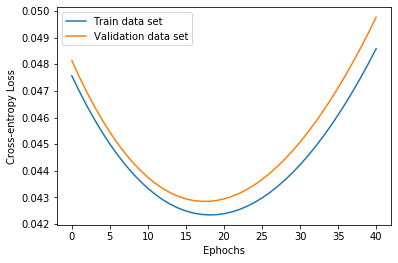

In [70]:
import matplotlib.pyplot as plt
plt.plot(ite_train, cost_train, label="Train data set")
plt.plot(ite_val, cost_val, label='Validation data set')
plt.xlabel('Ephochs')
plt.ylabel('Cross-entropy Loss')
plt.legend()
plt.show()

The optimum model complexity is in the middle of the curve. At ephochs around 10 to 28, the cost error is smaller. Specifically, under approximately 18 iterations, the model is the best.

## 4. 
### Train a logistic regression on the data set with lambda = 1e-3,1e-2, 1e-1, 1, 10, 100, using L2, L1, and Elastic net regularizations on the training and validation set

In [97]:
# Take "L1 model, lambda = 0.001, train data" as an example:

from sklearn.linear_model import LogisticRegression
#Y_train = Y_train.values.ravel()
#Y_val = Y_val.values.ravel()
#Y_test = Y_test.values.ravel()


lambda_=0.001
c=1/lambda_
lasso_model = LogisticRegression(penalty="l1",C=c,solver='liblinear')
lasso_model.fit(X_train, Y_train)
y_pred = lasso_model.predict(X_train)

print("predicted Labels: ",y_pred[0:10])
print("True Testing Labels: ",Y_train[0:10])

predicted Labels:  [1 0 1 0 0 1 0 0 0 0]
True Testing Labels:  [1 0 1 0 0 1 0 0 0 0]


In [98]:
print("First 10 Testing Predictions: ")
print("[Prob = 1", "Prob = 0]")      
print(lasso_model.predict_proba(X_train)[0:10])
print('Mean Testing Accuracy: ', lasso_model.score(X_test,Y_test))

First 10 Testing Predictions: 
[Prob = 1 Prob = 0]
[[0.00000000e+00 1.00000000e+00]
 [9.98061665e-01 1.93833545e-03]
 [4.16276530e-06 9.99995837e-01]
 [1.00000000e+00 3.88370364e-22]
 [9.96932247e-01 3.06775328e-03]
 [1.17990760e-04 9.99882009e-01]
 [9.99980676e-01 1.93243367e-05]
 [9.82528754e-01 1.74712463e-02]
 [9.99999996e-01 3.61987554e-09]
 [1.00000000e+00 1.33456598e-23]]


ValueError: X has 3 features per sample; expecting 247

In [76]:
#L1 model, train data,

# List to maintain the different Mean Testing Accuracy (scores)
scores = [] 
  
# List to maintain the different values of lambda
lambda_ = [0.001,0.01,0.1,1,10,100] 
#c=1/lambda_
c=[1000,100,10,1,0.1,0.01]
     

# Loop to compute the different values of scores
for i in range(6): 
    lasso_model = LogisticRegression(penalty="l1",C=c[i],solver='liblinear')
    lasso_model.fit(X_train, Y_train)
    score = lasso_model.score(X_test,Y_test)
    scores.append(score) 
  
# Loop to print the different values of scores 
for i in range(0, len(lambda_)): 
    print(str(lambda_[i])+' : '+str(scores[i])) 

0.001 : 0.9073506891271057
0.01 : 0.9104134762633997
0.1 : 0.9287901990811639
1 : 0.9624808575803981
10 : 0.9578866768759571
100 : 0.9387442572741195


In [77]:
#L1 model, validation data

# List to maintain the different scores 
scores = [] 
  
# List to maintain the different values of lambda
lambda_ = [0.001,0.01,0.1,1,10,100] 
#c=1/lambda_
c=[1000,100,10,1,0.1,0.01]


  
# Loop to compute the different values of  scores 
for i in range(6): 
    lasso_model = LogisticRegression(penalty="l1",C=c[i],solver='liblinear')
    lasso_model.fit(X_val, Y_val)
    score = lasso_model.score(X_test,Y_test)
    scores.append(score) 
  
# Loop to print the different values of scores 
for i in range(0, len(lambda_)): 
    print(str(lambda_[i])+' : '+str(scores[i])) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.001 : 0.8966309341500766
0.01 : 0.900459418070444
0.1 : 0.9157733537519143
1 : 0.9586523736600306
10 : 0.9571209800918836
100 : 0.9402756508422665


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
#L2 model, train data

# List to maintain the different scores 
scores = [] 
  
# List to maintain the different values of lambda
lambda_ = [0.001,0.01,0.1,1,10,100] 
#c=1/lambda_
c=[1000,100,10,1,0.1,0.01]
  

# Loop to compute the different values of scores 
for i in range(6): 
    rigid_model = LogisticRegression(penalty="l2",C=c[i],solver='liblinear')
    rigid_model.fit(X_train, Y_train)
    score = rigid_model.score(X_test,Y_test)
    scores.append(score) 
  
# Loop to print the different values of scores 
for i in range(0, len(lambda_)): 
    print(str(lambda_[i])+' : '+str(scores[i])) 

0.001 : 0.9119448698315467
0.01 : 0.9173047473200613
0.1 : 0.9387442572741195
1 : 0.9594180704441041
10 : 0.9693721286370597
100 : 0.9532924961715161


In [79]:
#L2 model, validation data

# List to maintain the different scores 
scores = [] 
  
# List to maintain the different values of lambda 
lambda_ = [0.001,0.01,0.1,1,10,100] 
#c=1/lambda_
c=[1000,100,10,1,0.1,0.01]


# Loop to compute the different values of scores 
for i in range(6): 
    rigid_model = LogisticRegression(penalty="l2",C=c[i],solver='liblinear')
    rigid_model.fit(X_val, Y_val)
    score = rigid_model.score(X_test,Y_test)
    scores.append(score) 
  
# Loop to print the different values of scores 
for i in range(0, len(lambda_)): 
    print(str(lambda_[i])+' : '+str(scores[i])) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.001 : 0.9035222052067381
0.01 : 0.9073506891271057
0.1 : 0.9218989280245024
1 : 0.9548238897396631
10 : 0.9624808575803981
100 : 0.9532924961715161


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
# Elastic net model, train data

# List to maintain the different scores 
scores = [] 
  
# List to maintain the different values of lambda
lambda_ = [0.001,0.01,0.1,1,10,100] 
#c=1/lambda_
c=[1000,100,10,1,0.1,0.01]
  

# Loop to compute the different values of scores 
for i in range(6): 
    en_model = LogisticRegression(penalty="elasticnet",C=c[i],solver='saga', l1_ratio=0.5)
    en_model.fit(X_train, Y_train)
    score = en_model.score(X_test,Y_test)
    scores.append(score) 
  
# Loop to print the different values of scores 
print("Elastic net model, train data:")
for i in range(0, len(lambda_)): 
    print(str(lambda_[i])+' : '+str(scores[i])) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

Elastic net model, train data:
0.001 : 0.9632465543644717
0.01 : 0.9632465543644717
0.1 : 0.9632465543644717
1 : 0.9632465543644717
10 : 0.9578866768759571
100 : 0.94104134762634


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [81]:
# Elastic net model, validation data

# List to maintain the different scores 
scores = [] 
  
# List to maintain the different values of lambda
lambda_ = [0.001,0.01,0.1,1,10,100] 
#c=1/lambda_
c=[1000,100,10,1,0.1,0.01]
  

# Loop to compute the different values of scores 
for i in range(6): 
    en_model = LogisticRegression(penalty="elasticnet",C=c[i],solver='saga', l1_ratio=0.5)
    en_model.fit(X_val, Y_val)
    score = en_model.score(X_test,Y_test)
    scores.append(score) 
  
# Loop to print the different values of scores 
print("Elastic net model, validation data:")
for i in range(0, len(lambda_)): 
    print(str(lambda_[i])+' : '+str(scores[i])) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/skl

Elastic net model, validation data:
0.001 : 0.9594180704441041
0.01 : 0.9594180704441041
0.1 : 0.9594180704441041
1 : 0.9594180704441041
10 : 0.9532924961715161
100 : 0.9418070444104135


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


#### To summarize the test scores, L1 model, train data:
0.001 : 0.9073506891271057

0.01 : 0.9104134762633997

0.1 : 0.9287901990811639

1 : 0.9624808575803981

10 : 0.9578866768759571

100 : 0.9387442572741195


#### L1 model, val data:
0.001 : 0.8966309341500766

0.01 : 0.9012251148545176

0.1 : 0.9142419601837672

1 : 0.9586523736600306

10 : 0.9571209800918836

100 : 0.9402756508422665

#### L2 model, train data:
0.001 : 0.9119448698315467

0.01 : 0.9173047473200613

0.1 : 0.9387442572741195

1 : 0.9594180704441041

10 : 0.9693721286370597

100 : 0.9532924961715161

#### L2 model. val data:
0.001 : 0.9035222052067381

0.01 : 0.9073506891271057

0.1 : 0.9218989280245024

1 : 0.9548238897396631

10 : 0.9624808575803981

100 : 0.9532924961715161

#### Elastic net model, train data:
0.001 : 0.9632465543644717

0.01 : 0.9632465543644717

0.1 : 0.9632465543644717

1 : 0.9632465543644717

10 : 0.9578866768759571

100 : 0.94104134762634

#### Elastic net model, val data:
0.001 : 0.9594180704441041

0.01 : 0.9594180704441041

0.1 : 0.9594180704441041

1 : 0.9594180704441041

10 : 0.9532924961715161

100 : 0.9418070444104135

In L1 model, when $\lambda=1$, the test score is the highest.

In L2 model, when $\lambda=10$, the test score is the highest.

In Elastic net model, the test scores are the same from $lambda= 0.001$ to $1$, then decreases from $lambda = 1$ to $100$.

I choose $\lambda=1$ to be the most appropriate one because it brings the highest test scores in both L1 and Elastic Net model.


5. Examine the coefficients for the optimal $\lambda$ values for L1, L2, and elastic net models and explain the results. Also explain the change in the coefficients as you increase and decrease regularization $\lambda$.

In [82]:
# L1 model, train data
lasso_model_train = LogisticRegression(penalty="l1",C=1/1,solver='liblinear')
lasso_model_train.fit(X_train, Y_train)

# L1 model, validation data
lasso_model_val = LogisticRegression(penalty="l1",C=1/1,solver='liblinear')
lasso_model_val.fit(X_val, Y_val)

# L2 model, train data
rigid_model_train = LogisticRegression(penalty="l2",C=1/1,solver='liblinear')
rigid_model_train.fit(X_train, Y_train)

# L2 model, validation data
rigid_model_val = LogisticRegression(penalty="l2",C=1/1,solver='liblinear')
rigid_model_val.fit(X_val, Y_val)

# Elastic net model, train data
en_model_train = LogisticRegression(penalty="elasticnet",C=1/1,solver='saga', l1_ratio=0.5)
en_model_train.fit(X_train, Y_train)

# Elastic net model, validation data
en_model_val = LogisticRegression(penalty="elasticnet",C=1/1,solver='saga', l1_ratio=0.5)
en_model_val.fit(X_val, Y_val)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
# First 15 Coefficients
coef1 = lasso_model_train.coef_[0][0:15]
coef2 = lasso_model_val.coef_[0][0:15]
coef3 = rigid_model_train.coef_[0][0:15]
coef4 = rigid_model_val.coef_[0][0:15]
coef5 = en_model_train.coef_[0][0:15]
coef6 = en_model_val.coef_[0][0:15]

# Creates pandas DataFrame
data = {'lasso_model_train_data':coef1, 'lasso_model_val_data':coef2, 'rigid_model_train_data':coef3, 'rigid_model_val_data':coef4, 'en_model_train_data':coef5, 'en_model_val_data':coef6} 
df = pd.DataFrame(data, index = list(range(1,16))) 
df



,lasso_model_train_data,lasso_model_val_data,rigid_model_train_data,rigid_model_val_data,en_model_train_data,en_model_val_data
1,0.919052,0.254845,0.980564,0.388138,0.298019,0.257874
2,0.000000,0.000000,-0.034757,0.009936,0.155853,0.136207
3,0.346063,0.000000,0.548276,0.060390,-0.000316,-0.033109
4,0.000000,-0.084621,0.046905,-0.323843,-0.002755,-0.030128
5,0.000000,0.000000,-0.234813,0.112742,0.038305,0.028795
6,0.288571,0.000000,0.349488,-0.168655,0.024994,-0.003356
7,0.383708,0.000000,0.525458,0.078480,0.067973,0.041997
8,0.314350,0.000000,0.402943,-0.024260,0.154090,0.065452
9,0.000000,0.000000,-0.034377,0.078470,0.111461,0.051444
10,0.172893,0.377689,0.385158,0.527819,0.138500,0.181768


### Take the first 15 coefficients as a peak:

Generally, most of the magnitude of coefficients in Rigid (L2) model are the largest compared to the coefficients from the other two model, and all the coefficients are non-zero values. Most of the coefficients in Lasso (L1) model are the second largest coefficients, some of the coefficients are 0 because the L1 regularization will shrink some parameters to zero. Coefficients from Elastic Net is somewhere between lasso and rigid. 

In L1 regression, some variables will not play any role in the model. L1 regression can be seen as a way to select features in a model. It penalizes the sum of absolute values of the coefficients. In other words, lasso can set some coefficients to zero, thus performing variable selection, while ridge regression cannot.

Rigid (L2) will shrink the coefficients for least important predictors, very close to zero. But it will never make them exactly zero. In other words, the final model will include all predictors. 

In general, the bigger the penalization (larger $\lambda$), the smaller the coefficients are.

### 6. Present and describe the results from the best performing logistic regression model, including sensitivity, specificity, a confusion matrix, accuracy, and F1 score on the test set. Why would accuracy not be a good metric if the data were imbalanced?

### To choose the best model, first compare the obtained test scores from the three models specifically when $\lambda=1$:

#### L1 model, train data:
1 : 0.9624808575803981

#### L1 model, val data:
1 : 0.9586523736600306

#### L2 model, train data:
1 : 0.9594180704441041

#### L2 model. val data:
1 : 0.9548238897396631

#### Elastic net model, train data:
1 : 0.9632465543644717

#### Elastic net model, val data:
1 : 0.9594180704441041

But here, the test scores from Elastic net model are the largest compared to the other two, by comparing the models using train data and validation data separately.


### Then compare sensitivity, specificity, a confusion matrix, accuracy, and F1 score from the three models:

In [84]:
#Building and training from the Rigid model. Using test data:
model_test = LogisticRegression(penalty="l2",C=1/1,solver='liblinear')
fitted1 = model_test.fit(X_test, Y_test)

###predicting values
predicted_values1=fitted1.predict(X_test)
predicted_values1[1:10]

### Converting predicted values into classes using threshold
threshold=0.8

predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1
predicted_class1

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_test,predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

# precision:
precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])

# recall:
recall = cm1[0,0]/(cm1[0,0]+cm1[0,1])

# F1 score:
f1 = 2*precision*recall/(precision+recall)
print('F1-score : ', f1)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix : 
 [[889   3]
 [  7 407]]
Accuracy :  0.9923430321592649
Sensitivity :  0.9966367713004485
Specificity :  0.9830917874396136
F1-score :  0.9944071588366891


In [85]:
#Building and training from the lasso model. Using test data:
model_test = LogisticRegression(penalty="l1",C=1/1,solver='liblinear')
fitted1 = model_test.fit(X_test, Y_test)

###predicting values
predicted_values1=fitted1.predict(X_test)
predicted_values1[1:10]

### Converting predicted values into classes using threshold
threshold=0.8

predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1
predicted_class1

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_test,predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

# precision:
precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])

# recall:
recall = cm1[0,0]/(cm1[0,0]+cm1[0,1])

# F1 score:
f1 = 2*precision*recall/(precision+recall)
print('F1-score : ', f1)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix : 
 [[888   4]
 [ 13 401]]
Accuracy :  0.9869831546707504
Sensitivity :  0.9955156950672646
Specificity :  0.9685990338164251
F1-score :  0.9905186837702176


In [86]:
#Building and training from the Elastic Net model. Using test data:
model_test = LogisticRegression(penalty="elasticnet",C=1/1,solver='saga', l1_ratio=0.5)
fitted1 = model_test.fit(X_test, Y_test)

###predicting values
predicted_values1=fitted1.predict(X_test)
predicted_values1[1:10]

### Converting predicted values into classes using threshold
threshold=0.8

predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1
predicted_class1

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_test,predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

# precision:
precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])

# recall:
recall = cm1[0,0]/(cm1[0,0]+cm1[0,1])

# F1 score:
f1 = 2*precision*recall/(precision+recall)
print('F1-score : ', f1)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix : 
 [[879  13]
 [ 32 382]]
Accuracy :  0.9655436447166922
Sensitivity :  0.9854260089686099
Specificity :  0.9227053140096618
F1-score :  0.9750415973377704


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


We can see that the Rigid model generally has the best accuracy, sensitivity, specificity, and f1-score compared to the other two models. So Rigid instead of Elastic net model is the best performing logistic regression model.

Additionally, rigid (L2) is the best logistic regression model for large set of parameters, because it works well if there are many large parameters of about the same value (ergo: when most predictors impact the response. Here in our data, we have 247 miRNA as parameters(predictors), so it satisfies that it has a large set of parameters.

#### Why would accuracy not be a good metric if the data were imbalanced?

Classification accuracy is a metric that summarizes the performance of a classification model as the number of correct predictions divided by the total number of predictions.

A really high accuracy from an imbalanced data is called "accuracy paradox". When the class distribution is slightly skewed, accuracy can still be a useful metric. When the skew in the class distributions are severe, accuracy can become an unreliable measure of model performance because of the intuitions developed by practitioners on datasets with an equal class distribution.

reference: https://machinelearningmastery.com/failure-of-accuracy-for-imbalanced-class-distributions/

### 7. Naïve Bayes classifier

The Naïve Bayes algorithm is based on the Bayes Theorem for calculating probabilities and conditional probabilities to predict the class of unknown data sets. It assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature, in other words, all of the properties independently contribute to the probability that an object is supposed to be a certain class. It computes $P(c|x)$ from $P(c)$, $P(x)$ and $P(x|c)$:

$$P(c|x) = \frac{P(x|c)P(c)}{P(x)}$$

I start with build a dataframe with the data given from the pdf assignment file:

In [88]:
town = ['Burlington','Rutland', 'Springfield', 'Springfield', 'Lebanon','Hanover','White River Junction', 'Hartford', 'Shelburne','Concord','Nashua','Lyme','Shelburne','Claremont','Springfield']
state = ['Vermont','Vermont','Vermont','New Hampshire','New Hampshire','New Hampshire','Vermont','Vermont','Vermont','New Hampshire','New Hampshire','New Hampshire','New Hampshire','New Hampshire','New Hampshire']
        
data = {'Town': town, 'State':state} 
df = pd.DataFrame(data) 
df



,Town,State
0,Burlington,Vermont
1,Rutland,Vermont
2,Springfield,Vermont
3,Springfield,New Hampshire
4,Lebanon,New Hampshire
5,Hanover,New Hampshire
6,White River Junction,Vermont
7,Hartford,Vermont
8,Shelburne,Vermont
9,Concord,New Hampshire


$P(Vermont|Springfield) = \frac{P(Springfield|Vermont) * P(Vermont)}{P (Springfield)}$

Here we have $P(Springfield|Vermont) = \frac{1}{6}$, $P(Springfield) = \frac{3}{15} = \frac{1}{5}$, $P(Vermont)= \frac{2}{5}$, 

so $P(Vermont|Springfield) =\frac{ \frac{1}{6} \frac{2}{5}}{\frac{1}{5}} = \frac{1}{3}$, which means that the probability of Springfield in Vermont is $\frac{1}{3}$, etc.

In [89]:
# prepare data
#town1 = ['Burlington', 'Springfield', 'White River Junction','Concord','Shelburne']
#town2 = ['Rutland', 'Lebanon', 'Hartford','Nashua','Claremont']
#town3 = ['Springfield','Hanover','Shelburne','Lyme','Springfield']


    #'Burlington=1', 'Springfield=2', 'White River Junction=3','Concord=4','Shelburne=5'
    #'Rutland=6', 'Lebanon=7', 'Hartford=8','Nashua=9','Claremont=10'
    # 'Springfield=2','Hanover=11','Shelburne=5','Lyme=12','Springfield=2'

# Generate train data:   
#town1 = np.array([1,2,3,4,5])    
#town2 = np.array([6,7,8,9,10])   
#town3 = np.array([2,11,5,12,2])

feature1 = ([[1,6,2],[2,7,11],[3,8,5],[4,9,12],[5,10,2]])

# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
state = ['Vermont','New Hampshire','Vermont','New Hampshire','New Hampshire']
label=le.fit_transform(state)
print("state:",label) # 1 is Vermont, 0 is New Hampshire


# Generate test data: Springfield, Shelburne, Manchester
# Springfield = 2; Shelburne = 5; Manchester not exist, thus set Manchester = 13 which doesn't exist in the town dataset.
X_test = np.array([[2,5,13]])



state: [1 0 1 0 0]


In [90]:
# Import Gaussian Naive Bayes model
# Sklearn applies Laplace smoothing by default when you train a Naive Bayes classifier.
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(feature1,label)

#Predict Output
y_pred = model.fit(feature1,label).predict(X_test) 
print('Predicted Springfield, Shelburne, Manchester: ', y_pred)

# just try a random set of towns that are only in Vermont to see what the predicted results are:
y_pred2= model.predict([[1,3,8]]) # Burlington=1; White River Junction=3; Hartford=8
print("Predicted Burlington, White River Junction, Hartford:", y_pred2)


Predicted Springfield, Shelburne, Manchester:  [0]
Predicted Burlington, White River Junction, Hartford: [1]


Since both of Springfield and Shelburne are predicted to be 0, meaning in New Hampshire, we can see that the 6th set of towns - Springfield, Shelburne, Manchester,  are in New Hampshire. Although Manchester is predicted to be in Vermont, we still follow the results of the two existed towns in the train data. 

Again, by using Gaussian Naive Bayes, the built in algorithm in sklearn takes care of the laplace smoothing automatically.

In [91]:
print("[Prob = 0", "Prob = 1]") 
print(model.predict_proba(feature1))

[Prob = 0 Prob = 1]
[[5.50006370e-03 9.94499936e-01]
 [9.99917627e-01 8.23732135e-05]
 [4.51469972e-01 5.48530028e-01]
 [9.99999991e-01 9.07796649e-09]
 [9.98036558e-01 1.96344195e-03]]


From above, we can see that the probability of the first set of town in New Hampshire is 5.50006370e-03, in Vermont is 9.94499936e-01.

The probability of the second set of town in New Hampshire is 9.99917627e-01, in Vermont is 8.23732135e-05, etc.

The estimted result could be problematic since it would give us probability 0 for documents with unknown town (Manchester). We use laplace smoothing (GaussianNB above) to solve the problem.

Setting $\alpha=1$ other other value is called Laplace smoothing.
Let's see how it works without laplace smoothing:

In [92]:
import numpy as np
rng = np.random.RandomState(1)
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB(alpha=1.0e-10, class_prior=None, fit_prior=True) 
# didn't set alpha to 0 because:
# "UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10"
model2.fit(feature1,label)

MultinomialNB(alpha=1e-10, class_prior=None, fit_prior=True)

In [93]:
#Predict Output
predicted1= model2.predict(X_test)
print("Predicted Springfield:", predicted1)


Predicted Springfield: [0]


From above, we get the same predicted results compared to Gaussian Naive Bayes with laplace smoothing.

In [94]:
print("[Prob = 0", "Prob = 1]") 
print(model2.predict_proba(feature1))

[Prob = 0 Prob = 1]
[[0.37822373 0.62177627]
 [0.93082248 0.06917752]
 [0.55608126 0.44391874]
 [0.93036734 0.06963266]
 [0.22433114 0.77566886]]


But the probability of the towns in the test set with respect to each class without laplace smoothing is different compared to with laplace smoothing.

Specifically, the third set of town should've been as Vermont, which is correctly predicted in GaussianNB model, but here without laplace smoothing, the third set of town is predicted to be more likely in New Hampshire. Similar opposite result appears in the 5th set of town.